In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import copy

In [34]:
# Read the CSV file into a DataFrame
LAX = pd.read_csv('LAX_DATA_INPUT.csv')

# Check the shape of the dataFrame
LAX.shape

(5624, 32)

In [35]:
LAX.head()

,SALE TYPE,SOLD DATE,PROPERTY TYPE,ADDRESS,CITY,STATE OR PROVINCE,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,...,INTERESTED,LATITUDE,LONGITUDE,PARK_DIST,HOSPITAL_D,RAIL_DIST,ESCHOOL,HSCHOOL,BUS_COUNTS,FnB_COUNTS
0,MLS Listing,NaN,Multi-Family (2-4 Unit),561 E Opp St,Wilmington,CA,90744,299000,0.0,0.0,...,Y,33.783303,-118.255513,374,4537.790498,7038,COMPTON UNIFIED SCHOOL,COMPTON UNIFIED SCHOOL,16.0,0.0
1,MLS Listing,NaN,Vacant Land,0 Future Pl,Los Angeles,CA,90065,199000,0.0,0.0,...,Y,34.101025,-118.231056,2687,3909.505004,2717,COMPTON UNIFIED SCHOOL,COMPTON UNIFIED SCHOOL,21.0,0.0
2,MLS Listing,NaN,Mobile/Manufactured Home,13120 Bradley Ave Spc 56,Sylmar,CA,91342,224900,2.0,2.0,...,Y,34.309203,-118.462502,2637,3951.118299,21211,COMPTON UNIFIED SCHOOL,COMPTON UNIFIED SCHOOL,9.0,0.0
3,MLS Listing,NaN,Vacant Land,8360 N UTICA Dr,Hollywood Hills,CA,90046,77777,0.0,0.0,...,Y,34.107620,-118.372406,4479,4328.917170,3856,COMPTON UNIFIED SCHOOL,COMPTON UNIFIED SCHOOL,0.0,1.0
4,MLS Listing,NaN,Vacant Land,0 Fenn St,Los Angeles,CA,90031,25000,0.0,0.0,...,Y,34.084489,-118.207177,1599,1804.167233,766,COMPTON UNIFIED SCHOOL,COMPTON UNIFIED SCHOOL,26.0,0.0


In [36]:
# Simplify feature names:
LAX = LAX.rename(columns={'URL (SEE https://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING)': 'URL',
                                   'STATE OR PROVINCE': 'STATE',
                                   'ZIP OR POSTAL CODE': 'ZIP',
                                   'SQUARE FEET': 'SQFT',
                                   'PROPERTY TYPE': 'PROP_TYPE',
                                   'LOT SIZE': 'LOT',
                                   'YEAR BUILT': 'YR_BUILT',
                                   '$/SQUARE FEET': 'PRICE_SQFT',
                                   })

In [37]:
selected = ['PROP_TYPE', 'ADDRESS', 'CITY', 'ZIP', 'PRICE', 'LOCATION', 'SQFT', 'YR_BUILT', 'MLS#', 'LATITUDE', 'LONGITUDE', 'PARK_DIST', 'HOSPITAL_D', 'RAIL_DIST', 'BUS_COUNTS', 'FnB_COUNTS']

data_df = copy.deepcopy(LAX[selected])

In [38]:
data_df.head()

,PROP_TYPE,ADDRESS,CITY,ZIP,PRICE,LOCATION,SQFT,YR_BUILT,MLS#,LATITUDE,LONGITUDE,PARK_DIST,HOSPITAL_D,RAIL_DIST,BUS_COUNTS,FnB_COUNTS
0,Multi-Family (2-4 Unit),561 E Opp St,Wilmington,90744,299000,196 - East Wilmington,400.0,1871.0,SB23198550,33.783303,-118.255513,374,4537.790498,7038,16.0,0.0
1,Vacant Land,0 Future Pl,Los Angeles,90065,199000,Mt Washington,0.0,0.0,24-359539,34.101025,-118.231056,2687,3909.505004,2717,21.0,0.0
2,Mobile/Manufactured Home,13120 Bradley Ave Spc 56,Sylmar,91342,224900,Sylmar,1344.0,1980.0,24001225,34.309203,-118.462502,2637,3951.118299,21211,9.0,0.0
3,Vacant Land,8360 N UTICA Dr,Hollywood Hills,90046,77777,C03 - Sunset Strip - Hollywood Hills West,0.0,0.0,SR24033678,34.107620,-118.372406,4479,4328.917170,3856,0.0,1.0
4,Vacant Land,0 Fenn St,Los Angeles,90031,25000,679 - Montecito Heights,0.0,0.0,SR24032746,34.084489,-118.207177,1599,1804.167233,766,26.0,0.0


In [39]:
# Check out null values
null_sum = data_df.isnull().sum()
null_sum

PROP_TYPE      0
ADDRESS       10
CITY           1
ZIP            0
PRICE          0
LOCATION      10
SQFT           0
YR_BUILT       0
MLS#           0
LATITUDE       0
LONGITUDE      0
PARK_DIST      0
HOSPITAL_D     0
RAIL_DIST      0
BUS_COUNTS     0
FnB_COUNTS     0
dtype: int64

In [40]:
data_df.drop(data_df[data_df['CITY'].isna()].index, inplace=True)
data_df.drop(data_df[data_df['ADDRESS'].isna()].index, inplace=True)
data_df.drop(data_df[data_df['LOCATION'].isna()].index, inplace=True)
null_sum = data_df.isnull().sum()
null_sum

PROP_TYPE     0
ADDRESS       0
CITY          0
ZIP           0
PRICE         0
LOCATION      0
SQFT          0
YR_BUILT      0
MLS#          0
LATITUDE      0
LONGITUDE     0
PARK_DIST     0
HOSPITAL_D    0
RAIL_DIST     0
BUS_COUNTS    0
FnB_COUNTS    0
dtype: int64

In [41]:
data_df.shape, data_df.columns

((5606, 16),
 Index(['PROP_TYPE', 'ADDRESS', 'CITY', 'ZIP', 'PRICE', 'LOCATION', 'SQFT',
        'YR_BUILT', 'MLS#', 'LATITUDE', 'LONGITUDE', 'PARK_DIST', 'HOSPITAL_D',
        'RAIL_DIST', 'BUS_COUNTS', 'FnB_COUNTS'],
       dtype='object'))

In [42]:
data_df.dtypes

PROP_TYPE      object
ADDRESS        object
CITY           object
ZIP             int64
PRICE           int64
LOCATION       object
SQFT          float64
YR_BUILT      float64
MLS#           object
LATITUDE      float64
LONGITUDE     float64
PARK_DIST       int64
HOSPITAL_D    float64
RAIL_DIST       int64
BUS_COUNTS    float64
FnB_COUNTS    float64
dtype: object

In [43]:
cat_col = ['PROP_TYPE', 'CITY', 'ZIP', 'LOCATION']
data_df[cat_col] = data_df[cat_col].astype('category')
data_df[cat_col]

,PROP_TYPE,CITY,ZIP,LOCATION
0,Multi-Family (2-4 Unit),Wilmington,90744,196 - East Wilmington
1,Vacant Land,Los Angeles,90065,Mt Washington
2,Mobile/Manufactured Home,Sylmar,91342,Sylmar
3,Vacant Land,Hollywood Hills,90046,C03 - Sunset Strip - Hollywood Hills West
4,Vacant Land,Los Angeles,90031,679 - Montecito Heights
...,...,...,...,...
5619,Single Family Residential,Pacific Palisades,90272,Pacific Palisades
5620,Single Family Residential,Los Angeles,90024,Bel Air - Holmby Hills
5621,Single Family Residential,Los Angeles,90069,Sunset Strip - Hollywood Hills West
5622,Single Family Residential,Beverly Hills,90210,Beverly Hills Post Office


In [44]:
# the following columns now all have the categorical data types
data_df[cat_col].dtypes

PROP_TYPE    category
CITY         category
ZIP          category
LOCATION     category
dtype: object

In [45]:
# check the data of PROPERTY TYPE
data_df['PROP_TYPE'].value_counts() 

Single Family Residential    2493
Condo/Co-op                  1040
Multi-Family (2-4 Unit)       861
Vacant Land                   606
Multi-Family (5+ Unit)        387
Townhouse                     169
Mobile/Manufactured Home       48
Unknown                         2
Name: PROP_TYPE, dtype: int64

In [46]:
# Merge two seperate multi-family categories into one single category
data_df['PROP_TYPE'].replace(['Multi-Family (5+ Unit)', 'Multi-Family (2-4 Unit)'],'Multi-Family', inplace=True)

In [47]:
data_df['PROP_TYPE'].value_counts() 

Single Family Residential    2493
Multi-Family                 1248
Condo/Co-op                  1040
Vacant Land                   606
Townhouse                     169
Mobile/Manufactured Home       48
Unknown                         2
Name: PROP_TYPE, dtype: int64

In [48]:
data_df.head()

,PROP_TYPE,ADDRESS,CITY,ZIP,PRICE,LOCATION,SQFT,YR_BUILT,MLS#,LATITUDE,LONGITUDE,PARK_DIST,HOSPITAL_D,RAIL_DIST,BUS_COUNTS,FnB_COUNTS
0,Multi-Family,561 E Opp St,Wilmington,90744,299000,196 - East Wilmington,400.0,1871.0,SB23198550,33.783303,-118.255513,374,4537.790498,7038,16.0,0.0
1,Vacant Land,0 Future Pl,Los Angeles,90065,199000,Mt Washington,0.0,0.0,24-359539,34.101025,-118.231056,2687,3909.505004,2717,21.0,0.0
2,Mobile/Manufactured Home,13120 Bradley Ave Spc 56,Sylmar,91342,224900,Sylmar,1344.0,1980.0,24001225,34.309203,-118.462502,2637,3951.118299,21211,9.0,0.0
3,Vacant Land,8360 N UTICA Dr,Hollywood Hills,90046,77777,C03 - Sunset Strip - Hollywood Hills West,0.0,0.0,SR24033678,34.107620,-118.372406,4479,4328.917170,3856,0.0,1.0
4,Vacant Land,0 Fenn St,Los Angeles,90031,25000,679 - Montecito Heights,0.0,0.0,SR24032746,34.084489,-118.207177,1599,1804.167233,766,26.0,0.0


In [49]:
len(data_df)

5606

In [50]:
average_sqft = data_df[data_df['SQFT'] != 0]['SQFT'].mean()

data_df.loc[data_df['SQFT'] == 0, 'SQFT'] = average_sqft

average_yr = data_df[data_df['YR_BUILT'] != 0]['YR_BUILT'].mean()

data_df.loc[data_df['YR_BUILT'] == 0, 'YR_BUILT'] = average_yr

In [51]:
num_col = ['PRICE', 'SQFT', 'YR_BUILT', 'PARK_DIST', 'HOSPITAL_D', 'RAIL_DIST', 'BUS_COUNTS', 'FnB_COUNTS']

In [52]:
data_df[num_col].describe()

,PRICE,SQFT,YR_BUILT,PARK_DIST,HOSPITAL_D,RAIL_DIST,BUS_COUNTS,FnB_COUNTS
count,5.606000e+03,5606.000000,5606.000000,5606.000000,5606.000000,5606.000000,5606.000000,5606.000000
mean,2.773830e+06,3224.438916,1962.976331,2520.346771,3186.879395,6235.317695,19.302355,14.338209
std,6.831027e+06,3999.680290,32.888467,1557.267092,2013.290768,6963.754880,19.249619,32.375172
min,1.000000e+00,1.000000,1871.000000,83.000000,107.364795,28.000000,0.000000,0.000000
25%,7.690000e+05,1462.250000,1938.000000,1320.250000,1684.345540,1664.250000,7.000000,0.000000
50%,1.299000e+06,2370.000000,1962.976331,2207.500000,2834.054458,3445.500000,16.000000,3.000000
75%,2.499000e+06,3299.000000,1983.000000,3487.000000,4212.688546,7533.500000,26.000000,12.000000
max,1.950000e+08,105940.000000,2026.000000,10131.000000,12897.155325,31699.000000,129.000000,258.000000


<Axes: xlabel='YR_BUILT'>

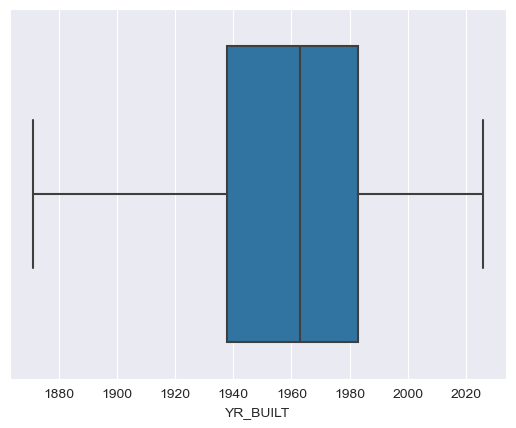

In [53]:
# draw box plot to check outliers
attr = 'YR_BUILT'
sns.set_style("darkgrid",{'axes.grid' : True})
sns.boxplot(x=data_df[attr], orient='h')

In [54]:
Q1 = data_df[attr].quantile(0.25)
Q3 = data_df[attr].quantile(0.75)
IQR = Q3 - Q1
lower_thresh = Q1 - 1.5*IQR
upper_thresh = Q3 + 1.5*IQR
print(Q1, Q3, lower_thresh, upper_thresh)

1938.0 1983.0 1870.5 2050.5


In [55]:
import copy
data_check = copy.deepcopy(data_df)

data_check



,PROP_TYPE,ADDRESS,CITY,ZIP,PRICE,LOCATION,SQFT,YR_BUILT,MLS#,LATITUDE,LONGITUDE,PARK_DIST,HOSPITAL_D,RAIL_DIST,BUS_COUNTS,FnB_COUNTS
0,Multi-Family,561 E Opp St,Wilmington,90744,299000,196 - East Wilmington,400.000000,1871.000000,SB23198550,33.783303,-118.255513,374,4537.790498,7038,16.0,0.0
1,Vacant Land,0 Future Pl,Los Angeles,90065,199000,Mt Washington,3224.438916,1962.976331,24-359539,34.101025,-118.231056,2687,3909.505004,2717,21.0,0.0
2,Mobile/Manufactured Home,13120 Bradley Ave Spc 56,Sylmar,91342,224900,Sylmar,1344.000000,1980.000000,24001225,34.309203,-118.462502,2637,3951.118299,21211,9.0,0.0
3,Vacant Land,8360 N UTICA Dr,Hollywood Hills,90046,77777,C03 - Sunset Strip - Hollywood Hills West,3224.438916,1962.976331,SR24033678,34.107620,-118.372406,4479,4328.917170,3856,0.0,1.0
4,Vacant Land,0 Fenn St,Los Angeles,90031,25000,679 - Montecito Heights,3224.438916,1962.976331,SR24032746,34.084489,-118.207177,1599,1804.167233,766,26.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5619,Single Family Residential,1490 San Remo Dr,Pacific Palisades,90272,19999000,Pacific Palisades,8500.000000,2022.000000,23-322075,34.057075,-118.497504,3201,4068.317339,4939,12.0,0.0
5620,Single Family Residential,133 S Mapleton Dr,Los Angeles,90024,65000000,Bel Air - Holmby Hills,30000.000000,1962.976331,21-705644,34.081662,-118.433378,4338,2501.337180,6105,10.0,0.0
5621,Single Family Residential,1521 N Kings Rd,Los Angeles,90069,6195000,Sunset Strip - Hollywood Hills West,4368.000000,1933.000000,24-347635,34.098730,-118.374607,5250,3109.259248,4031,9.0,2.0
5622,Single Family Residential,2859 Coldwater Canyon Dr,Beverly Hills,90210,11995000,Beverly Hills Post Office,3224.438916,1959.000000,23-318037,34.123916,-118.404531,763,6924.874014,5134,0.0,0.0


In [56]:
for attr in num_col:
    Q1 = data_check[attr].quantile(0.25)
    Q3 = data_check[attr].quantile(0.75)
    IQR = Q3 - Q1
    lower_thresh = Q1 - 1.5 * IQR
    upper_thresh = Q3 + 1.5 * IQR
    print(attr, Q1, Q3, lower_thresh, upper_thresh)

    # Use | for logical OR and additional parentheses for proper order of operations
    data_check.drop(data_check[(data_check[attr] > upper_thresh) | (data_check[attr] < lower_thresh)].index, inplace=True)

# Print the length of the filtered DataFrame
print(len(data_check))


PRICE 769000.0 2499000.0 -1826000.0 5094000.0
SQFT 1400.0 3224.438915857605 -1336.6583737864075 5961.097289644013
YR_BUILT 1935.0 1980.0 1867.5 2047.5
PARK_DIST 1289.0 3429.25 -1921.375 6639.625
HOSPITAL_D 1663.5642177243 4213.41378945451 -2161.2101398710156 8038.188147049826
RAIL_DIST 1512.5 6388.0 -5800.75 13701.25
BUS_COUNTS 10.0 29.0 -18.5 57.5
FnB_COUNTS 0.0 11.0 -16.5 27.5
3402


In [57]:

# Export df to csv:
data_check.to_csv('LAX_DATA_OUTPUT.csv')